In [ ]:
"""
Purpose: To check on the status of the soma finder


"""

In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

WARNING - 2020-11-19 06:09:22,738 - trimesh_repair - Need to pip install annotationframeworkclient to repair mesh with pychunkedgraph
WARNING - 2020-11-19 06:09:22,739 - trimesh_io - Need to pip install annotationframeworkclient to use dataset_name parameters


In [3]:
import minfig
du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-19 06:10:15,201 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-19 06:10:15,202 - settings - Setting database.user to celiib
INFO - 2020-11-19 06:10:15,203 - settings - Setting database.password to newceliipass
INFO - 2020-11-19 06:10:15,210 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-19 06:10:15,211 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-19 06:10:15,221 - connection - Connect

Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons
Connecting celiib@at-database.ad.bcm.edu:3306


# Chccking the current progress of Soma Extraction

In [18]:
dj.config["display.limit"] = 50

INFO - 2020-11-19 06:13:31,994 - settings - Setting display.limit to 50


In [46]:
minnie.BaylorSegmentCentroid() & "n_vertices>0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,soma_vertices array of vertices,soma_faces array of faces,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,run_time the amount of time to run (seconds)
864691134875978746,0,0.25,1,280121,269557,24006,1521,3205,=BLOB=,=BLOB=,1,0.588,1.246,2.824,32.5835
864691134878304762,0,0.25,1,268880,266885,17030,1150,2698,=BLOB=,=BLOB=,1,0.548,1.168,2.486,29.8677
864691134917392138,0,0.25,1,336221,168969,17996,3145,6222,=BLOB=,=BLOB=,1,0.836,1.239,3.581,171.237
864691134917395466,0,0.25,1,136710,177524,24691,2489,4730,=BLOB=,=BLOB=,1,0.837,1.279,2.844,149.253
864691134917417994,0,0.25,1,138705,158356,18019,1828,3358,=BLOB=,=BLOB=,1,0.845,1.078,3.16,59.7716
864691134939998563,0,0.25,1,369327,248979,24798,1358,2430,=BLOB=,=BLOB=,1,0.803,1.139,2.572,177.024
864691134940010339,0,0.25,1,146036,187070,20625,3337,6488,=BLOB=,=BLOB=,1,0.832,1.173,2.751,121.3087
864691134947381756,0,0.25,1,193447,101479,24677,4332,8765,=BLOB=,=BLOB=,1,0.743,1.259,3.499,281.9301
864691134947393276,0,0.25,1,151208,204448,23086,4996,9814,=BLOB=,=BLOB=,1,0.773,1.253,4.846,279.0923
864691134947414268,0,0.25,1,229180,177427,18052,2593,5041,=BLOB=,=BLOB=,1,0.719,1.13,3.161,96.3614


In [48]:
len(minnie.BaylorSegmentCentroid()) - 62

19629

In [62]:
error_key = (schema.jobs & "table_name='__baylor_segment_centroid'" & "status='error'" &
 "error_message='TypeError: only integer scalar arrays can be converted to a scalar index'").fetch("key")
# "error_message!='ValueError: zero-size array to reduction operation maximum which has no identity'")


In [49]:
len(schema.jobs & "table_name='__baylor_segment_centroid'")#.delete()

563

# checking the soma extraction

In [377]:
curr_seg_id = error_key[16]["segment_id"]
pulled_mesh = du.fetch_segment_id_mesh(curr_seg_id)

INFO - 2020-11-20 00:42:17,730 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-20 00:42:18,068 - settings - Setting enable_python_native_blobs to True


In [382]:
tu.largest_hole_length(soma_info[0][0])

12081.886831872154

In [378]:
sm = reload(sm)
soma_info = sm.extract_soma_center(curr_seg_id,
                      current_mesh_verts=pulled_mesh.vertices,
                      current_mesh_faces=pulled_mesh.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 5000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 7015 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_51221.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_51221_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_723786.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or 

WARNING - 2020-11-20 00:42:29,019 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,036 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,076 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,083 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,092 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,096 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,114 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,125 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,139 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,156 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,182 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,190 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,194 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-20 00:42:29,878 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,909 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,909 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,910 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,912 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,913 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,948 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,948 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:29,949 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:30,051 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:30,051 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:30,053 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:30,054 - base - face_normals all zero, ignoring!
WARNING - 20

Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(5972, 3), faces.shape=(14611, 3))>, <trimesh.Trimesh(vertices.shape=(3779, 3), faces.shape=(9267, 3))>, <trimesh.Trimesh(vertices.shape=(1833, 3), faces.shape=(4348, 3))>, <trimesh.Trimesh(vertices.shape=(1512, 3), faces.shape=(2372, 3))>, <trimesh.Trimesh(vertices.shape=(1506, 3), faces.shape=(2368, 3))>, <trimesh.Trimesh(vertices.shape=(1197, 3), faces.shape=(1822, 3))>, <trimesh.Trimesh(vertices.shape=(1192, 3), faces.shape=(1815, 3))>, <trimesh.Trimesh(vertices.shape=(1005, 3), faces.shape=(2316, 3))>, <trimesh.Trimesh(vertices.shape=(635, 3), faces.shape=(1470, 3))>, <trimesh.Trimesh(vertices.shape=(634, 3), faces.shape=(927, 3))>, <trimesh.Trimesh(vertices.shape=(630, 3), faces.shape=(918, 3))>, <trimesh.Trimesh(vertices.shape=(509, 3), faces.shape=(754, 3))>, <trimesh.Trimesh(vertices.shape=(507, 3), faces.shape=(749, 3))>, <trimesh.Trimesh(vertices.shape=(426, 3), faces.shape=(931, 3))>, <trimesh.Trimesh(v

WARNING - 2020-11-20 00:42:35,180 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,196 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,223 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,230 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,233 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,252 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,268 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,269 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,298 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,300 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,327 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,328 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:35,329 - base - face_normals all zero, ignoring!
WARNING - 20

Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(9981, 3), faces.shape=(16884, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(9981, 3), faces.shape=(16884, 3))>
remove_inside_pieces requested 
xvfb-run -n 1754 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_39200.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_39200_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_939120.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_39200.off
removed temporary output file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_39200_fill_holes.off
/notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_939120.mls is being deleted....
xvfb-run -n 6186 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_53276.off -o /notebooks/Platinum_Dat

WARNING - 2020-11-20 00:42:56,764 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,781 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,807 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,816 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,819 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,837 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,853 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,854 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,884 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,887 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,915 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,916 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:42:56,917 - base - face_normals all zero, ignoring!
WARNING - 20

# total split meshes = 40
viable_meshes = [0]
There were 37 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(2649, 3), faces.shape=(5280, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(48882, 3), faces.shape=(94625, 3))>

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(45915, 3), faces.shape=(90851, 3))>]
There were 1 pieces found after size threshold
mesh pieces in subtact soma AFTER the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(45915, 3), faces.shape=(90851, 3))>]
Total Time for soma mesh cancellation = 0.252
mesh_pieces_without_soma = [<trimesh.Trimesh(vertices.shape=(45915, 3), faces.shape=(90851, 3))>]
Total time for Subtract Soam = 0.252760648727417
Total time for Original_mesh_faces_map for mesh_pieces without soma= 0.0

WARNING - 2020-11-20 00:43:05,780 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,797 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,822 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,830 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,834 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,851 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,867 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,868 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,895 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,898 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,924 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,925 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:43:05,927 - base - face_normals all zero, ignoring!
WARNING - 20

# total split meshes = 40
viable_meshes = [0]
There were 37 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(1124, 3), faces.shape=(2244, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(48882, 3), faces.shape=(94625, 3))>

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(35940, 3), faces.shape=(69208, 3))>, <trimesh.Trimesh(vertices.shape=(3651, 3), faces.shape=(7031, 3))>, <trimesh.Trimesh(vertices.shape=(464, 3), faces.shape=(753, 3))>, <trimesh.Trimesh(vertices.shape=(293, 3), faces.shape=(574, 3))>]
There were 4 pieces found after size threshold
mesh pieces in subtact soma AFTER the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(35940, 3), faces.shape=(69208, 3))>, <trimesh.Trimesh(vertices.shape=(3651, 3), faces.shape=(7031, 3))


Largest hole before segmentation = 12081.886831872154, after = 794616.3039634479,
ratio = 65.76922255779131, difference = 782534.4171315758


/meshAfterParty/trimesh_utils.py:996: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))
/meshAfterParty/networkx_utils.py:511: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [379]:
soma_info

([<trimesh.Trimesh(vertices.shape=(8590, 3), faces.shape=(17059, 3))>],
 36.593233585357666,
 array([0.865304]))

In [380]:
nviz.plot_objects(pulled_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [381]:
nviz.plot_objects(meshes=soma_info[0])

# Debugging Soma Extraction

In [89]:
curr_seg_id = error_key[0]["segment_id"]
new_mesh = du.fetch_segment_id_mesh(curr_seg_id)

INFO - 2020-11-19 20:00:02,341 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-19 20:00:02,567 - settings - Setting enable_python_native_blobs to True


In [90]:
import neuron_visualizations as nviz
nviz.plot_objects(new_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [55]:
import soma_extraction_utils as sm

In [67]:
import trimesh_utils as tu
tu = reload(tu)
sm = reload(sm)
sm.extract_soma_center(segment_id=curr_seg_id,
                      current_mesh_faces=new_mesh.faces,
                      current_mesh_verts=new_mesh.vertices)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 3297 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/864691135212671104/neuron_864691135212671104.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/864691135212671104/neuron_864691135212671104_decimated.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/864691135212671104/decimation_meshlab_25742950.mls


WARNING - 2020-11-19 17:48:19,273 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,274 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,307 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,310 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,323 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,325 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,364 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,370 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,371 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,433 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,439 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,446 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:19,447 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 17:48:20,553 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,553 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,554 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,567 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,567 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,568 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,586 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,593 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,626 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,633 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,695 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,696 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:20,759 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 17:48:22,508 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,512 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,532 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,533 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,602 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,605 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,606 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,611 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,613 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,615 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,627 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,641 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:22,648 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 17:48:23,565 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,614 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,616 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,625 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,630 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,647 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,652 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,658 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,666 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,668 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,669 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,671 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:23,678 - base - face_normals all zero, ignoring!
WARNING - 20

Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(16497, 3), faces.shape=(40265, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(16497, 3), faces.shape=(40265, 3))>
remove_inside_pieces requested 
xvfb-run -n 6335 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_66411.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_66411_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_928502.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to a

WARNING - 2020-11-19 17:48:49,242 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,243 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,277 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,280 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,294 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,295 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,336 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,342 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,343 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,404 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,411 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,418 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:49,419 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 17:48:50,463 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,463 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,464 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,477 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,478 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,479 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,495 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,502 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,534 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,540 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,599 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,600 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:50,652 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 17:48:52,255 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,260 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,280 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,280 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,336 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,340 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,340 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,347 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,349 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,351 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,361 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,375 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 17:48:52,382 - base - face_normals all zero, ignoring!
WARNING - 20

# total split meshes = 228
viable_meshes = [0]
There were 211 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(3756, 3), faces.shape=(7126, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(16497, 3), faces.shape=(39794, 3))>

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(16492, 3), faces.shape=(39779, 3))>]
There were 1 pieces found after size threshold
mesh pieces in subtact soma AFTER the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(16492, 3), faces.shape=(39779, 3))>]
Total Time for soma mesh cancellation = 0.2
mesh_pieces_without_soma = [<trimesh.Trimesh(vertices.shape=(16492, 3), faces.shape=(39779, 3))>]
Total time for Subtract Soam = 0.20059609413146973
Total time for Original_mesh_faces_map for mesh_pieces without soma= 0

([], 43.93001198768616, [])

In [80]:
recov_orig_mesh = trimesh.Trimesh(vertices=current_mesh_verts,faces=current_mesh_faces)
recov_orig_mesh_no_interior = tu.remove_mesh_interior(recov_orig_mesh)

In [81]:
tu.split(recov_orig_mesh)

WARNING - 2020-11-19 19:54:03,660 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,661 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,695 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,697 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,711 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,712 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,751 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,757 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,758 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,820 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,826 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,833 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:03,834 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 19:54:04,733 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,734 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,735 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,748 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,749 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,749 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,766 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,772 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,805 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,811 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,870 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,871 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:04,915 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 19:54:06,432 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,437 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,455 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,456 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,503 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,506 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,507 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,513 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,515 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,517 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,526 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,539 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:06,545 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 19:54:07,315 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,357 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,360 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,367 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,371 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,391 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,397 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,404 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,412 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,415 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,415 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,417 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:07,424 - base - face_normals all zero, ignoring!
WARNING - 20

(array([<trimesh.Trimesh(vertices.shape=(143856, 3), faces.shape=(300266, 3))>,
        <trimesh.Trimesh(vertices.shape=(7499, 3), faces.shape=(13634, 3))>,
        <trimesh.Trimesh(vertices.shape=(3369, 3), faces.shape=(6716, 3))>,
        ..., <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>,
        <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>,
        <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>],
       dtype=object),
 array([array([236724, 236736, 236735, ..., 173318, 127803, 127802]),
        array([143796,  85407,  85406, ...,  71316,  71315,  70625]),
        array([318675, 318674, 318673, ..., 316433, 316432, 316435]), ...,
        array([109273]), array([109272]), array([0])], dtype=object))

In [82]:
tu.split(recov_orig_mesh_no_interior)

WARNING - 2020-11-19 19:54:45,885 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,887 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,901 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,902 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,939 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,945 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:45,946 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,004 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,011 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,017 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,018 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,080 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:46,088 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 19:54:47,618 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,619 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,620 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,630 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,631 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,632 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,634 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,719 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,721 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,723 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,723 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,724 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 19:54:47,760 - base - face_normals all zero, ignoring!
WARNING - 20

(array([<trimesh.Trimesh(vertices.shape=(120529, 3), faces.shape=(240747, 3))>,
        <trimesh.Trimesh(vertices.shape=(3369, 3), faces.shape=(6716, 3))>,
        <trimesh.Trimesh(vertices.shape=(1982, 3), faces.shape=(4654, 3))>,
        ..., <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>,
        <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>,
        <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>],
       dtype=object),
 array([array([184055, 184056, 184057, ..., 101216, 101215, 101214]),
        array([235904, 235905, 236015, ..., 238203, 238293, 238292]),
        array([42264, 39814, 42242, ..., 37783, 37781, 37782]), ...,
        array([49640]), array([49641]), array([56379])], dtype=object))

In [83]:
dec_mesh = tu.decimate(recov_orig_mesh_no_interior)
nviz.plot_objects(dec_mesh)

xvfb-run -n 5778 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_55059.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_55059_decimated.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/decimation_meshlab_25809634.mls


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [ ]:
#Step 1: Decimate the Mesh and then split into the seperate pieces
new_mesh,output_obj = Dec_outer(vertices=current_mesh_verts,
         faces=current_mesh_faces,
         segment_id=segment_id,
         return_mesh=True,
         delete_temp_files=False)

In [88]:
nviz.plot_objects(meshes=[recov_orig_mesh])

# Hole Filling

In [224]:
ex_border

TrackedArray([[633057.8, 977231.8, 615251.4],
              [633554.4, 977124.6, 615902. ],
              [633956.4, 977357.2, 616341.2],
              [633941.4, 977437.4, 616447.8],
              [634068.4, 977588.5, 616419.2],
              [634181. , 977574.2, 616400.2],
              [634221. , 977697. , 616392. ],
              [634221. , 977697. , 616350. ],
              [634150.8, 977737.4, 616268.6],
              [634058. , 977948.8, 615901.1],
              [634417.6, 978189.9, 616288.8],
              [634478.1, 979083.5, 616020.5],
              [634784.4, 978814.2, 616521.9],
              [634998.1, 979352.9, 616938.4],
              [635233.5, 979420.1, 617496.9],
              [634954.9, 979917.2, 617327.8],
              [635201.9, 979846.8, 618261.3],
              [635143.2, 980379.2, 619029.7],
              [635437.2, 980878.8, 619515. ],
              [635564.4, 980414.3, 619670.8],
              [635837.6, 981017.7, 620001.9],
              [635928.8, 980516.4,

In [237]:
tu = reload(tu)
from trimesh_utils import *


largest_hole_length(filtered_soma_list_saved[0]),largest_hole_length(return_value[0][0])

/meshAfterParty/networkx_utils.py:500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cycles_list_array = np.array(cycles_list)


(85, 140)

In [235]:
56726/8877.415158584241

6.389923078582999

In [216]:
nviz.plot_objects(return_value[0][0],
                 scatters=border_vert_groups[0])

In [213]:
border_vert_groups,border_vert_sizes = tu.find_border_vertex_groups(return_value[0][0],
                             return_cycles=True,
                            return_sizes=True,
                                                                   return_coordinates=True)
np.max(border_vert_sizes)

/meshAfterParty/networkx_utils.py:500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cycles_list_array = np.array(cycles_list)


140

In [214]:
np.where(border_vert_sizes == np.max(border_vert_sizes))

(array([0]),)

In [197]:
from trimesh_utils import *
mesh = filtered_soma_list_saved[0]

if len(mesh.faces) < 3:
    return_value= []

if mesh.is_watertight:
    return_value= []

# we know that in a watertight mesh every edge will be included twice
# thus every edge which appears only once is part of a hole boundary
boundary_groups = group_rows(
    mesh.edges_sorted, require_count=1)

# mesh is not watertight and we have too few edges
# edges to do a repair
# since we haven't changed anything return False
if len(boundary_groups) < 3:
    return_value = []

boundary_edges = mesh.edges[boundary_groups]
index_as_dict = [{'index': i} for i in boundary_groups]

# we create a graph of the boundary edges, and find cycles.
g = nx.from_edgelist(
    np.column_stack((boundary_edges,
                     index_as_dict)))
border_edge_groups = list(nx.connected_components(g))
return_value = [list(k) for k in border_edge_groups]

In [200]:
xu.find_all_cycles(g)

/meshAfterParty/networkx_utils.py:500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cycles_list_array = np.array(cycles_list)


[[10,
  178,
  169,
  652,
  1643,
  1479,
  653,
  13,
  632,
  634,
  475,
  478,
  1228,
  328,
  2312,
  884,
  1694,
  510,
  244,
  243,
  2138,
  1167,
  1982,
  2433,
  1423,
  2114,
  2128,
  2342,
  1288,
  1561,
  69,
  733,
  294,
  1798,
  1699,
  115,
  770,
  765,
  431,
  139,
  1753,
  933,
  242,
  513,
  1377,
  2471,
  2266,
  660,
  1848,
  1009,
  1478,
  628,
  675,
  674,
  641,
  639,
  640,
  681,
  686,
  656,
  658,
  624,
  627,
  671,
  680,
  648,
  655,
  613,
  623,
  626,
  1375,
  644,
  682,
  1406,
  1219,
  778,
  1322,
  370,
  828,
  1223,
  2437,
  2295,
  966,
  1481,
  434],
 [10,
  178,
  169,
  652,
  1643,
  1479,
  653,
  13,
  632,
  634,
  475,
  478,
  1228,
  328,
  2312,
  884,
  1694,
  510,
  244,
  243,
  2138,
  1167,
  1982,
  2433,
  1423,
  2114,
  2128,
  2342,
  1288,
  1561,
  69,
  733,
  294,
  1798,
  1699,
  115,
  2256,
  431,
  139,
  1753,
  933,
  242,
  513,
  1377,
  2471,
  2266,
  660,
  1848,
  1009,
  1478,
  6

In [198]:
return_value

[[707, 709, 39, 40, 853, 855],
 [869, 51, 52, 53],
 [67, 68, 880, 881, 1690, 732],
 [3,
  1029,
  1799,
  393,
  777,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  1680,
  394,
  1679,
  1681,
  406,
  150,
  408,
  409,
  922,
  410,
  540,
  413,
  407,
  415,
  1312,
  539,
  1949,
  414,
  2599,
  1833,
  1712,
  1458,
  1459,
  2363,
  190,
  1859,
  1862,
  1995,
  462,
  1745,
  2012,
  2147,
  1126,
  1127,
  103,
  104,
  874,
  1001,
  118,
  1528,
  1275],
 [2048,
  1026,
  2562,
  2566,
  522,
  529,
  2580,
  28,
  1573,
  38,
  2604,
  45,
  562,
  2614,
  73,
  77,
  78,
  1103,
  80,
  2131,
  1645,
  1655,
  1656,
  129,
  132,
  1157,
  134,
  135,
  1168,
  2199,
  2209,
  1189,
  1701,
  1704,
  1705,
  1706,
  1707,
  690,
  1208,
  2237,
  2240,
  2249,
  206,
  1746,
  1238,
  1239,
  1240,
  729,
  1241,
  2279,
  2280,
  1767,
  1258,
  1796,
  2310,
  1290,
  1293,
  271,
  2326,
  291,
  1331,
  1334,
  1336,
  2362,
  839,
  840,
  841,
  1891,
  1384,


In [177]:
import networkx_utils as xu

/meshAfterParty/networkx_utils.py:500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cycles_list_array = np.array(cycles_list)


[[1, 2, 3, 4, 5, 6], [5, 7, 8, 9]]

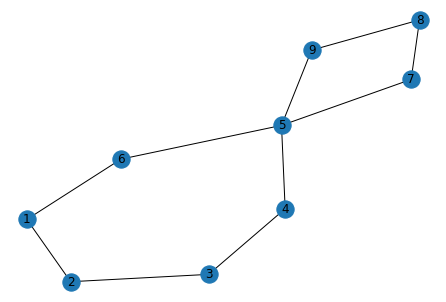

In [192]:
nx.draw(G,with_labels=True)
xu.find_all_cycles(G)

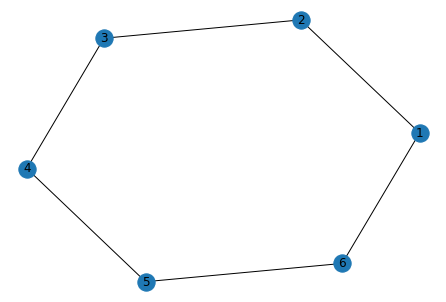

max_degree_for_cyc = 2


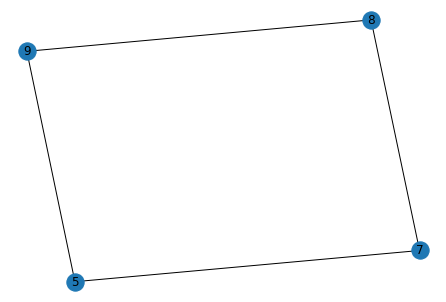

max_degree_for_cyc = 2


In [190]:
edges = [[1,2],
        [2,3],
        [3,4],
        [4,5],
        [5,6],
        [6,1],
        [5,7],
        [7,8],
        [8,9],
        [9,5]]
G = nx.from_edgelist(edges)

import matplotlib.pyplot as plt
all_cycles = xu.find_all_cycles(G)
for cyc in all_cycles:
    sub_graph = G.subgraph(cyc)
    nx.draw(sub_graph,with_labels=True)
    plt.show()
    max_degree_for_cyc = np.max(list(dict(sub_graph.degree()).values()))
    print(f"max_degree_for_cyc = {max_degree_for_cyc}")

dict_values([2, 2, 2, 2, 2, 2])

# Debugging the Soma Extraction

In [95]:
import copy

In [285]:
large_mesh_threshold

15000.0

In [356]:
from soma_extraction_utils import *
xu = reload(xu)
tu = reload(tu)

segment_id=curr_seg_id
current_mesh_faces=pulled_mesh.faces
current_mesh_verts=pulled_mesh.vertices

outer_decimation_ratio= 0.25
large_mesh_threshold = 20000 # comes out to a 5000 threshold after decimation
large_mesh_threshold_inner = 40000
soma_width_threshold = 0.32
soma_size_threshold = 15000
inner_decimation_ratio = 0.25
volume_mulitplier=8
#side_length_ratio_threshold=3
side_length_ratio_threshold=6
soma_size_threshold_max=192000 #this puts at 12000 once decimated, another possible is 256000
delete_files=True
backtrack_soma_mesh_to_original=True #should either be None or 
boundary_vertices_threshold=None#700 the previous threshold used
poisson_backtrack_distance_threshold=None#1500 the previous threshold used
close_holes=False

#------- 11/12 Additions --------------- #

#these arguments are for removing inside pieces
remove_inside_pieces = True
size_threshold_to_remove=1000 #size accounting for the decimation


pymeshfix_clean=False
check_holes_before_pymeshfix=False
second_poisson=False
segmentation_at_end=True
last_size_threshold = 2000#1300
largest_hole_threshold = 17000
                           
    
    
global_start_time = time.time()

#Adjusting the thresholds based on the decimations
large_mesh_threshold = large_mesh_threshold*outer_decimation_ratio
large_mesh_threshold_inner = large_mesh_threshold_inner*outer_decimation_ratio
soma_size_threshold = soma_size_threshold*outer_decimation_ratio
soma_size_threshold_max = soma_size_threshold_max*outer_decimation_ratio

#adjusting for inner decimation
soma_size_threshold = soma_size_threshold*inner_decimation_ratio
soma_size_threshold_max = soma_size_threshold_max*inner_decimation_ratio
print(f"Current Arguments Using (adjusted for decimation):\n large_mesh_threshold= {large_mesh_threshold}"
             f" \nlarge_mesh_threshold_inner = {large_mesh_threshold_inner}"
              f" \nsoma_size_threshold = {soma_size_threshold}"
             f" \nsoma_size_threshold_max = {soma_size_threshold_max}"
             f"\nouter_decimation_ratio = {outer_decimation_ratio}"
             f"\ninner_decimation_ratio = {inner_decimation_ratio}")


# ------------------------------


temp_folder = f"./{segment_id}"
temp_object = Path(temp_folder)
#make the temp folder if it doesn't exist
temp_object.mkdir(parents=True,exist_ok=True)

#making the decimation and poisson objections
Dec_outer = meshlab.Decimator(outer_decimation_ratio,temp_folder,overwrite=True)
Dec_inner = meshlab.Decimator(inner_decimation_ratio,temp_folder,overwrite=True)
Poisson_obj = meshlab.Poisson(temp_folder,overwrite=True)


recov_orig_mesh = trimesh.Trimesh(vertices=current_mesh_verts,faces=current_mesh_faces)
recov_orig_mesh_no_interior = tu.remove_mesh_interior(recov_orig_mesh)


#Step 1: Decimate the Mesh and then split into the seperate pieces
new_mesh,output_obj = Dec_outer(vertices=recov_orig_mesh_no_interior.vertices,
         faces=recov_orig_mesh_no_interior.faces,
         segment_id=segment_id,
         return_mesh=True,
         delete_temp_files=False)

# if remove_inside_pieces:
#     print("removing mesh interior after decimation")
#     new_mesh = tu.remove_mesh_interior(new_mesh,size_threshold_to_remove=size_threshold_to_remove)

#preforming the splits of the decimated mesh

mesh_splits = new_mesh.split(only_watertight=False)

#get the largest mesh
mesh_lengths = np.array([len(split.faces) for split in mesh_splits])


total_mesh_split_lengths = [len(k.faces) for k in mesh_splits]
ordered_mesh_splits = mesh_splits[np.flip(np.argsort(total_mesh_split_lengths))]
list_of_largest_mesh = [k for k in ordered_mesh_splits if len(k.faces) > large_mesh_threshold]

print(f"Total found significant pieces before Poisson = {list_of_largest_mesh}")

#if no significant pieces were found then will use smaller threshold
if len(list_of_largest_mesh)<=0:
    print(f"Using smaller large_mesh_threshold because no significant pieces found with {large_mesh_threshold}")
    list_of_largest_mesh = [k for k in ordered_mesh_splits if len(k.faces) > large_mesh_threshold/2]

total_soma_list = []
total_classifier_list = []
total_poisson_list = []
total_soma_list_sdf = []



#start iterating through where go through all pieces before the poisson reconstruction
no_somas_found_in_big_loop = 0
for i,largest_mesh in enumerate(list_of_largest_mesh):
    print(f"----- working on large mesh #{i}: {largest_mesh}")

    if remove_inside_pieces:
        print("remove_inside_pieces requested ")
        largest_mesh = tu.remove_mesh_interior(largest_mesh,size_threshold_to_remove=size_threshold_to_remove)


    if pymeshfix_clean:
        print("Requested pymeshfix_clean")
        """
        Don't have to check if manifold anymore actually just have to plug the holes
        """
        hole_groups = tu.find_border_face_groups(largest_mesh)
        if len(hole_groups) > 0:
            largest_mesh_filled_holes = tu.fill_holes(largest_mesh,max_hole_size = 10000)
        else:
            largest_mesh_filled_holes = largest_mesh

        if check_holes_before_pymeshfix:
            hole_groups = tu.find_border_face_groups(largest_mesh_filled_holes)
        else:
            print("Not checking if there are still existing holes before pymeshfix")
            hole_groups = []

        if len(hole_groups) > 0:
            #segmentation_at_end = False
            print(f"*** COULD NOT FILL HOLES WITH MAX SIZE OF {np.max([len(k) for k in hole_groups])} so not applying pymeshfix and segmentation_at_end = {segmentation_at_end}")

#                 tu.write_neuron_off(largest_mesh_filled_holes,"largest_mesh_filled_holes")
#                 raise Exception()
        else:
            print("Applying pymeshfix_clean because no more holes")
            largest_mesh = tu.pymeshfix_clean(largest_mesh_filled_holes,verbose=True)

    if second_poisson:
        print("Applying second poisson run")
        current_neuron_poisson = tu.poisson_surface_reconstruction(largest_mesh)
        largest_mesh = tu.split_significant_pieces(current_neuron_poisson)[0]

    somas_found_in_big_loop = False

    largest_file_name = str(output_obj.stem) + "_largest_piece.off"
    pre_largest_mesh_path = temp_object / Path(str(output_obj.stem) + "_largest_piece.off")
    pre_largest_mesh_path = pre_largest_mesh_path.absolute()
    print(f"pre_largest_mesh_path = {pre_largest_mesh_path}")
    # ******* This ERRORED AND CALLED OUR NERUON NONE: 77697401493989254 *********
    new_mesh_inner,poisson_file_obj = Poisson_obj(vertices=largest_mesh.vertices,
               faces=largest_mesh.faces,
               return_mesh=True,
               mesh_filename=largest_file_name,
               delete_temp_files=False)


    #splitting the Poisson into the largest pieces and ordering them
    mesh_splits_inner = new_mesh_inner.split(only_watertight=False)
    total_mesh_split_lengths_inner = [len(k.faces) for k in mesh_splits_inner]
    ordered_mesh_splits_inner = mesh_splits_inner[np.flip(np.argsort(total_mesh_split_lengths_inner))]

    list_of_largest_mesh_inner = [k for k in ordered_mesh_splits_inner if len(k.faces) > large_mesh_threshold_inner]
    print(f"Total found significant pieces AFTER Poisson = {list_of_largest_mesh_inner}")

    n_failed_inner_soma_loops = 0
    for j, largest_mesh_inner in enumerate(list_of_largest_mesh_inner):
        print(f"----- working on mesh after poisson #{j}: {largest_mesh_inner}")

        largest_mesh_path_inner = str(poisson_file_obj.stem) + "_largest_inner.off"

        #Decimate the inner poisson piece
        largest_mesh_path_inner_decimated,output_obj_inner = Dec_inner(
                            vertices=largest_mesh_inner.vertices,
                             faces=largest_mesh_inner.faces,
                            mesh_filename=largest_mesh_path_inner,
                             return_mesh=True,
                             delete_temp_files=False)

        print(f"done exporting decimated mesh: {largest_mesh_path_inner}")

        faces = np.array(largest_mesh_path_inner_decimated.faces)
        verts = np.array(largest_mesh_path_inner_decimated.vertices)

        segment_id_new = int(str(segment_id) + f"{i}{j}")
        #print(f"Before the classifier the pymeshfix_clean = {pymeshfix_clean}")
        verts_labels, faces_labels, soma_value,classifier = wcda.extract_branches_whole_neuron(
                                import_Off_Flag=False,
                                segment_id=segment_id_new,
                                vertices=verts,
                                 triangles=faces,
                                pymeshfix_Flag=False,
                                 import_CGAL_Flag=False,
                                 return_Only_Labels=True,
                                 clusters=3,
                                 smoothness=0.2,
                                soma_only=True,
                                return_classifier = True
                                )
        print(f"soma_sdf_value = {soma_value}")

        total_classifier_list.append(classifier)
        #total_poisson_list.append(largest_mesh_path_inner_decimated)

        # Save all of the portions that resemble a soma
        median_values = np.array([v["median"] for k,v in classifier.sdf_final_dict.items()])
        segmentation = np.array([k for k,v in classifier.sdf_final_dict.items()])

        #order the compartments by greatest to smallest
        sorted_medians = np.flip(np.argsort(median_values))
        print(f"segmentation[sorted_medians],median_values[sorted_medians] = {(segmentation[sorted_medians],median_values[sorted_medians])}")
        print(f"Sizes = {[classifier.sdf_final_dict[g]['n_faces'] for g in segmentation[sorted_medians]]}")
        print(f"soma_size_threshold = {soma_size_threshold}")
        print(f"soma_size_threshold_max={soma_size_threshold_max}")

        valid_soma_segments_width = [g for g,h in zip(segmentation[sorted_medians],median_values[sorted_medians]) if ((h > soma_width_threshold)
                                                            and (classifier.sdf_final_dict[g]["n_faces"] > soma_size_threshold)
                                                            and (classifier.sdf_final_dict[g]["n_faces"] < soma_size_threshold_max))]
        valid_soma_segments_sdf = [h for g,h in zip(segmentation[sorted_medians],median_values[sorted_medians]) if ((h > soma_width_threshold)
                                                            and (classifier.sdf_final_dict[g]["n_faces"] > soma_size_threshold)
                                                            and (classifier.sdf_final_dict[g]["n_faces"] < soma_size_threshold_max))]

        print("valid_soma_segments_width")
        to_add_list = []
        to_add_list_sdf = []
        if len(valid_soma_segments_width) > 0:
            print(f"      ------ Found {len(valid_soma_segments_width)} viable somas: {valid_soma_segments_width}")
            somas_found_in_big_loop = True
            #get the meshes only if signfiicant length
            labels_list = classifier.labels_list

            for v,sdf in zip(valid_soma_segments_width,valid_soma_segments_sdf):
                submesh_face_list = np.where(classifier.labels_list == v)[0]
                soma_mesh = largest_mesh_path_inner_decimated.submesh([submesh_face_list],append=True)

                # ---------- No longer doing the extra checks in here --------- #


                curr_side_len_check = side_length_check(soma_mesh,side_length_ratio_threshold)
                curr_volume_check = soma_volume_check(soma_mesh,volume_mulitplier)
                if curr_side_len_check and curr_volume_check:
                    to_add_list.append(soma_mesh)
                    to_add_list_sdf.append(sdf)

                else:
                    print(f"--->This soma mesh was not added because it did not pass the sphere validation:\n "
                         f"soma_mesh = {soma_mesh}, curr_side_len_check = {curr_side_len_check}, curr_volume_check = {curr_volume_check}")
                    continue

            n_failed_inner_soma_loops = 0

        else:
            n_failed_inner_soma_loops += 1

        total_soma_list_sdf += to_add_list_sdf
        total_soma_list += to_add_list

        # --------------- KEEP TRACK IF FAILED TO FIND SOMA (IF TOO MANY FAILS THEN BREAK)
        if n_failed_inner_soma_loops >= 2:
            print("breaking inner loop because 2 soma fails in a row")
            break


    # --------------- KEEP TRACK IF FAILED TO FIND SOMA (IF TOO MANY FAILS THEN BREAK)
    if somas_found_in_big_loop == False:
        no_somas_found_in_big_loop += 1
        if no_somas_found_in_big_loop >= 2:
            print("breaking because 2 fails in a row in big loop")
            break

    else:
        no_somas_found_in_big_loop = 0





""" IF THERE ARE MULTIPLE SOMAS THAT ARE WITHIN A CERTAIN DISTANCE OF EACH OTHER THEN JUST COMBINE THEM INTO ONE"""
pairings = []
for y,soma_1 in enumerate(total_soma_list):
    for z,soma_2 in enumerate(total_soma_list):
        if y<z:
            mesh_tree = KDTree(soma_1.vertices)
            distances,closest_node = mesh_tree.query(soma_2.vertices)

            if np.min(distances) < 4000:
                pairings.append([y,z])


#creating the combined meshes from the list
total_soma_list_revised = []
total_soma_list_revised_sdf = []
if len(pairings) > 0:
    """
    Pseudocode: 
    Use a network function to find components

    """


    import networkx as nx
    new_graph = nx.Graph()
    new_graph.add_edges_from(pairings)
    grouped_somas = list(nx.connected_components(new_graph))

    somas_being_combined = []
    print(f"There were soma pairings: Connected components in = {grouped_somas} ")
    for comp in grouped_somas:
        comp = list(comp)
        somas_being_combined += list(comp)
        current_mesh = total_soma_list[comp[0]]
        for i in range(1,len(comp)):
            current_mesh += total_soma_list[comp[i]] #just combining the actual meshes

        total_soma_list_revised.append(current_mesh)
        #where can average all of the sdf values
        total_soma_list_revised_sdf.append(np.min(np.array(total_soma_list_sdf)[comp]))

    #add those that weren't combined to total_soma_list_revised
    leftover_somas = [total_soma_list[k] for k in range(0,len(total_soma_list)) if k not in somas_being_combined]
    leftover_somas_sdfs = [total_soma_list_sdf[k] for k in range(0,len(total_soma_list)) if k not in somas_being_combined]
    if len(leftover_somas) > 0:
        total_soma_list_revised += leftover_somas
        total_soma_list_revised_sdf += leftover_somas_sdfs

    print(f"Final total_soma_list_revised = {total_soma_list_revised}")
    print(f"Final total_soma_list_revised_sdf = {total_soma_list_revised_sdf}")


if len(total_soma_list_revised) == 0:
    total_soma_list_revised = total_soma_list
    total_soma_list_revised_sdf = total_soma_list_sdf

run_time = time.time() - global_start_time

print(f"\n\n\n Total time for run = {time.time() - global_start_time}")
print(f"Before Filtering the number of somas found = {len(total_soma_list_revised)}")

#     import system_utils as su
#     su.compressed_pickle(total_soma_list_revised,"total_soma_list_revised")
#     su.compressed_pickle(new_mesh,"original_mesh")

#need to erase all of the temporary files ******
#import shutil
#shutil.rmtree(directory)

"""
Running the extra tests that depend on
- border vertices
- how well the poisson matches the backtracked soma to the real mesh
- other size checks

"""
filtered_soma_list = []
filtered_soma_list_sdf = []
for soma_mesh,curr_soma_sdf in zip(total_soma_list_revised,total_soma_list_revised_sdf):
    if backtrack_soma_mesh_to_original:
        print("Performing Soma Mesh Backtracking to original mesh")
        soma_mesh_poisson = deepcopy(soma_mesh)
        try:
            #print("About to find original mesh")
            soma_mesh = original_mesh_soma(
                                            mesh = recov_orig_mesh_no_interior,
                                            soma_meshes=[soma_mesh_poisson],
                                            sig_th_initial_split=15)[0]
        except:
            import traceback
            traceback.print_exc()
            print("--->This soma mesh was not added because Was not able to backtrack soma to mesh")
            continue
        else:
            if soma_mesh is None:
                print("--->This soma mesh was not added because Was not able to backtrack soma to mesh")
                continue




        print(f"poisson_backtrack_distance_threshold = {poisson_backtrack_distance_threshold}")
        #do the check that tests if there is a max distance between poisson and backtrack:
        if not poisson_backtrack_distance_threshold is None and poisson_backtrack_distance_threshold > 0:

            #soma_mesh.export("soma_mesh.off")
            if close_holes: 
                print("Using the close holes feature")
                fill_hole_obj = meshlab.FillHoles(max_hole_size=2000,
                                                 self_itersect_faces=False)

                soma_mesh_filled_holes,output_subprocess_obj = fill_hole_obj(   
                                                    vertices=soma_mesh.vertices,
                                                     faces=soma_mesh.faces,
                                                     return_mesh=True,
                                                     delete_temp_files=True,
                                                    )
            else:
                soma_mesh_filled_holes = soma_mesh


            #soma_mesh_filled_holes.export("soma_mesh_filled_holes.off")



            print("APPLYING poisson_backtrack_distance_threshold CHECKS")
            mesh_1 = soma_mesh_filled_holes
            mesh_2 = soma_mesh_poisson

            poisson_max_distance = tu.max_distance_betwee_mesh_vertices(mesh_1,mesh_2,
                                                              verbose=True)
            print(f"poisson_max_distance = {poisson_max_distance}")
            if poisson_max_distance > poisson_backtrack_distance_threshold:
                print(f"--->This soma mesh was not added because it did not pass the poisson_backtrack_distance check:\n"
                  f" poisson_max_distance = {poisson_max_distance}")
                continue

    if len(soma_mesh.faces) < 5:
        print(f"--> soma had very few faces ({soma_mesh}) so continuing")
        continue

    #do the boundary check:
    if not boundary_vertices_threshold is None:
        print("USING boundary_vertices_threshold CHECK")
        soma_boundary_groups_sizes = np.array([len(k) for k in tu.find_border_face_groups(soma_mesh)])
        print(f"soma_boundary_groups_sizes = {soma_boundary_groups_sizes}")
        large_boundary_groups = soma_boundary_groups_sizes[soma_boundary_groups_sizes>boundary_vertices_threshold]
        print(f"large_boundary_groups = {large_boundary_groups} with boundary_vertices_threshold = {boundary_vertices_threshold}")
        if len(large_boundary_groups)>0:
            print(f"--->This soma mesh was not added because it did not pass the boundary vertices validation:\n"
                  f" large_boundary_groups = {large_boundary_groups}")
            continue

    curr_side_len_check = side_length_check(soma_mesh,side_length_ratio_threshold)
    curr_volume_check = soma_volume_check(soma_mesh,volume_mulitplier)
    if (not curr_side_len_check) or (not curr_volume_check):
        print(f"--->This soma mesh was not added because it did not pass the sphere validation:\n "
             f"soma_mesh = {soma_mesh}, curr_side_len_check = {curr_side_len_check}, curr_volume_check = {curr_volume_check}")
        continue

    #tu.write_neuron_off(soma_mesh_poisson,"original_poisson.off")
    #If made it through all the checks then add to final list
    filtered_soma_list.append(soma_mesh)
    filtered_soma_list_sdf.append(curr_soma_sdf)


"""
Need to delete all files in the temp folder *****
"""

if delete_files:
    #now erase all of the files used
    from shutil import rmtree

    #remove the directory with the meshes
    rmtree(str(temp_object.absolute()))

    #removing the temporary files
    temp_folder = Path("./temp")
    temp_files = [x for x in temp_folder.glob('**/*')]
    seg_temp_files = [x for x in temp_files if str(segment_id) in str(x)]

    for f in seg_temp_files:
        f.unlink()

# ----------- 11 /11 Addition that does a last step segmentation of the soma --------- #
#return total_soma_list, run_time
#return total_soma_list_revised,run_time,total_soma_list_revised_sdf

"""
Things we should ask about the segmentation:

Advantages: 
1) could help filter away negatives

Disadvantages:
1) Can actually cut up the soma and then filter away the soma (not what we want)
2) Could introduce a big hole (don't think can guard against this)
"""


filtered_soma_list_saved = copy.deepcopy(filtered_soma_list)

if len(filtered_soma_list) > 0:
    filtered_soma_list_revised = []
    filtered_soma_list_sdf_revised = []
    for f_soma,f_soma_sdf in zip(filtered_soma_list,filtered_soma_list_sdf):
        
        print("Skipping the segmentatio filter at end")
        if not (len(f_soma.faces) >= last_size_threshold and f_soma_sdf >= soma_width_threshold):
            print(f"Soma (size = {len(f_soma.faces)}, width={soma_width_threshold}) did not pass thresholds (size threshold={last_size_threshold}, width threshold = {soma_width_threshold}) ")
            continue
            
            
        if segmentation_at_end:
            

            if remove_inside_pieces:
                print("removing mesh interior before segmentation")
                f_soma = tu.remove_mesh_interior(f_soma,size_threshold_to_remove=size_threshold_to_remove)

            print("Doing the soma segmentation filter at end")

            meshes_split,meshes_split_sdf = tu.mesh_segmentation(
                mesh = f_soma,
                smoothness=0.5
            )
#                 print(f"meshes_split = {meshes_split}")
#                 print(f"meshes_split_sdf = {meshes_split_sdf}")

            #applying the soma width and the soma size threshold
            above_width_threshold_mask = meshes_split_sdf>=soma_width_threshold
            meshes_split_sizes = np.array([len(k.faces) for k in meshes_split])
            above_size_threshold_mask = meshes_split_sizes >= last_size_threshold

            above_width_threshold_idx = np.where(above_width_threshold_mask & above_size_threshold_mask)[0]
            if len(above_width_threshold_idx) == 0:
                print(f"No split meshes were above the width threshold ({soma_width_threshold}) and size threshold ({last_size_threshold}) so continuing")
                print(f"So just going with old somas")
                
                f_soma_final = f_soma
                f_soma_sdf_final = f_soma_sdf
                
                
            else:
                meshes_split = np.array(meshes_split)
                meshes_split_sdf = np.array(meshes_split_sdf)

                meshes_split_filtered = meshes_split[above_width_threshold_idx]
                meshes_split_sdf_filtered = meshes_split_sdf[above_width_threshold_idx]

                soma_width_threshold
                #way to choose the index of the top candidate
                top_candidate = 0


                largest_hole_before_seg = tu.largest_hole_length(f_soma)
                largest_hole_after_seg = tu.largest_hole_length(meshes_split_filtered[top_candidate])

                print(f"Largest hole before segmentation = {largest_hole_before_seg}, after = {largest_hole_after_seg},"
                      f"\nratio = {largest_hole_after_seg/largest_hole_before_seg}, difference = {largest_hole_after_seg - largest_hole_before_seg}")

                if largest_hole_after_seg < largest_hole_threshold:
                    f_soma_final = meshes_split_filtered[top_candidate]
                    f_soma_sdf_final = meshes_split_sdf_filtered[top_candidate]
                else:
                    f_soma_final = f_soma
                    f_soma_sdf_final = f_soma_sdf
        
        else:
            f_soma_final = f_soma
            f_soma_sdf_final = f_soma_sdf
            
            
        filtered_soma_list_revised.append(f_soma_final)
        filtered_soma_list_sdf_revised.append(f_soma_sdf_final)
        


    filtered_soma_list = np.array(filtered_soma_list_revised)
    filtered_soma_list_sdf = np.array(filtered_soma_list_sdf_revised)

return_value = list(filtered_soma_list),run_time,filtered_soma_list_sdf 


Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 1415 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_25319.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_25319_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_251390.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or

WARNING - 2020-11-20 00:25:40,078 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,079 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,084 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,085 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,127 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,128 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,130 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,131 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,132 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,133 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,134 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,138 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:40,139 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-20 00:25:41,939 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:41,958 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:41,959 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:41,962 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:41,963 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,002 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,004 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,038 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,041 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,042 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,043 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,046 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:42,047 - base - face_normals all zero, ignoring!
WARNING - 20

Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(27467, 3), faces.shape=(74365, 3))>, <trimesh.Trimesh(vertices.shape=(2401, 3), faces.shape=(5712, 3))>, <trimesh.Trimesh(vertices.shape=(1500, 3), faces.shape=(3493, 3))>, <trimesh.Trimesh(vertices.shape=(1396, 3), faces.shape=(3297, 3))>, <trimesh.Trimesh(vertices.shape=(792, 3), faces.shape=(1885, 3))>]
xvfb-run -n 2553 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/neuron_864691135699252258.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/neuron_864691135699252258_decimated.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/decimation_meshlab_25291989.mls


WARNING - 2020-11-20 00:25:50,284 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,285 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,412 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,488 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,506 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,511 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,519 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,532 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,537 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,608 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,656 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,735 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:50,736 - base - face_normals all zero, ignoring!
WARNING - 20

Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(15059, 3), faces.shape=(27911, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(15059, 3), faces.shape=(27911, 3))>
remove_inside_pieces requested 
xvfb-run -n 5469 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_86249.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_86249_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_743023.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_86249.off
removed temporary output file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_86249_fill_holes.off
/notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_743023.mls is being deleted....
xvfb-run -n 5885 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_8085.off -o /notebooks/Platinum_Da

WARNING - 2020-11-20 00:25:55,846 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:25:55,955 - base - face_normals all zero, ignoring!


removed temporary input file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_8085.off
removed temporary output file: /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_8085_remove_interior.off
/notebooks/Platinum_Datajoint/Soma_Extraction/temp/remove_interior_232971.mls is being deleted....
THERE WERE NO MESH PIECES GREATER THAN THE significance_threshold
No significant (1000) interior meshes present
largest is 301
pre_largest_mesh_path = /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/neuron_864691135699252258_decimated_largest_piece.off
xvfb-run -n 7909 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/neuron_864691135699252258_decimated_largest_piece.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/neuron_864691135699252258_decimated_largest_piece_poisson.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/864691135699252258/poisson_274113.mls
Total found signific

WARNING - 2020-11-20 00:26:16,682 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,684 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,806 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,878 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,897 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,901 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,910 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,921 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,927 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:16,993 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:17,041 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:17,129 - base - face_normals all zero, ignoring!
WARNING - 2020-11-20 00:26:17,130 - base - face_normals all zero, ignoring!
WARNING - 20

# total split meshes = 100
viable_meshes = [0]
There were 98 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(3581, 3), faces.shape=(7092, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(82971, 3), faces.shape=(163510, 3))>

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(24245, 3), faces.shape=(48138, 3))>, <trimesh.Trimesh(vertices.shape=(9712, 3), faces.shape=(19233, 3))>, <trimesh.Trimesh(vertices.shape=(8011, 3), faces.shape=(16028, 3))>, <trimesh.Trimesh(vertices.shape=(6565, 3), faces.shape=(13000, 3))>, <trimesh.Trimesh(vertices.shape=(5934, 3), faces.shape=(11619, 3))>, <trimesh.Trimesh(vertices.shape=(3756, 3), faces.shape=(7475, 3))>, <trimesh.Trimesh(vertices.shape=(3481, 3), faces.shape=(6474, 3))>, <trimesh.Trimesh(vertices.shape=(

/meshAfterParty/trimesh_utils.py:331: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2515 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/neuron_556128.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/neuron_556128_poisson.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/poisson_341268.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/neuron_556128.off
removed temporary output file: /notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/neuron_556128_poisson.off
mesh.is_watertight = True
/notebooks/Platinum_Datajoint/Soma_Extraction/Poisson_temp/poisson_341268.mls is being deleted....
Inside sphere validater: ratio_val = 2.556517649206274
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 6731 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_33653.

/meshAfterParty/trimesh_utils.py:996: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


Timed out when trying to find the cycles!
Finding the cycles did not work when doing the border vertex edge so using connected components
Largest hole before segmentation = 405785.099955278, after = 983829.8568302724,
ratio = 2.4245095666122323, difference = 578044.7568749944


/meshAfterParty/networkx_utils.py:511: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [350]:
st_mesh = return_value[0][0]
border_vert_groups,border_vert_sizes = tu.find_border_vertex_groups(st_mesh,
                                return_coordinates=True,
                                 return_cycles=True,
                                return_sizes=True,)


In [352]:
border_lengths = [border_euclidean_length(k) for k in border_vert_groups]
largest_border_idx = np.argmax(border_lengths)


1

In [353]:
nviz.plot_objects(st_mesh,
                 scatters=border_vert_groups[largest_border_idx])

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [343]:
nviz.plot_objects(meshes=meshes_split,
                 meshes_colors="random")

In [355]:
nviz.plot_objects(pulled_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [354]:
curr_seg_id = error_key[12]["segment_id"]
pulled_mesh = du.fetch_segment_id_mesh(curr_seg_id)

INFO - 2020-11-20 00:24:57,752 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-20 00:24:58,093 - settings - Setting enable_python_native_blobs to True


In [ ]:
ratios = [6.38, ]
diff = [47,849]
bad_size = [50000,22892,7000000]

good_ratios = [1.23],
good diff = [2494]
good size = [13187]

In [357]:
nviz.plot_objects(meshes=return_value[0])

In [358]:
nviz.plot_objects(meshes=filtered_soma_list_saved)

In [264]:
nviz.plot_objects(recov_orig_mesh_no_interior)

In [269]:
tu = reload(tu)
updated_mesh = tu.remove_mesh_interior(recov_orig_mesh_no_interior)

xvfb-run -n 3317 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_56010.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_56010_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_348909.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces from Non Manifold Edges
Reading filter with name

WARNING - 2020-11-19 22:45:44,210 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,455 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,456 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,509 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,512 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,700 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:44,707 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,094 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,189 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,192 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,336 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,338 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 22:45:45,605 - base - face_normals all zero, ignoring!
WARNING - 20

Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(752, 3), faces.shape=(1359, 3))>, <trimesh.Trimesh(vertices.shape=(575, 3), faces.shape=(1262, 3))>, <trimesh.Trimesh(vertices.shape=(529, 3), faces.shape=(748, 3))>, <trimesh.Trimesh(vertices.shape=(528, 3), faces.shape=(745, 3))>, <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1152, 3))>, <trimesh.Trimesh(vertices.shape=(483, 3), faces.shape=(1004, 3))>, <trimesh.Trimesh(vertices.shape=(469, 3), faces.shape=(1062, 3))>, <trimesh.Trimesh(vertices.shape=(414, 3), faces.shape=(924, 3))>, <trimesh.Trimesh(vertices.shape=(409, 3), faces.shape=(928, 3))>]


In [270]:
nviz.plot_objects(updated_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [166]:
def hole_sizes(mesh):
    border_groups = tu.find_border_face_groups(mesh)
    border_groups_len = [len(k) for k in border_groups]
    return border_groups_len

print(hole_sizes(return_value[0][0]))
print(hole_sizes(filtered_soma_list_saved[0]))

[19, 360, 14, 8, 7, 44, 12, 6, 14, 10, 7, 10, 7, 15, 7, 16, 7, 7, 13, 10]
[14, 13, 9, 85, 234, 6, 19, 263, 15, 27, 74, 11, 123, 72, 123, 143, 6, 7, 40, 14, 7, 8, 7, 88, 159, 42, 54, 6, 32, 33, 34, 10, 15, 8, 16, 27, 6, 20, 10, 11, 22, 7, 6, 16, 13, 22, 13, 16, 12, 14, 7, 12, 9, 10, 16, 13, 7, 34, 7, 23, 10, 19, 7, 7, 15, 31, 18, 13, 8, 29, 7, 15, 7, 13, 16, 16, 11, 6, 17, 8, 12, 9, 30, 6, 22, 9, 7, 7, 16, 13, 12, 17, 8, 10, 15, 8, 17]


In [171]:
tu = reload(tu)
face_gropus,face_group_sizes = tu.find_border_face_groups(filtered_soma_list_saved[0],return_sizes=True)

In [174]:
face_gropus

[array([3892, 3932, 3934, 3935, 3936, 4130, 4353, 4355, 4356, 4357, 4358,
        4360, 4387, 4447]),
 array([3694, 3695, 3696, 3897, 3898, 3899, 3919, 3921, 3922, 3927, 3956,
        4159, 4160]),
 array([2095, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2209]),
 array([2529, 2530, 2619, 2620, 2629, 2638, 2639, 2640, 2641, 2642, 2643,
        2644, 2658, 2659, 2660, 2673, 2674, 2675, 2676, 2677, 2727, 2728,
        2729, 2730, 2731, 2732, 2733, 2734, 2741, 2742, 2743, 2744, 2750,
        2876, 2891, 2893, 2894, 2904, 2905, 2906, 2907, 2908, 2909, 2910,
        2917, 2918, 2919, 2923, 2924, 2925, 2926, 2927, 2931, 2939, 2940,
        2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2970, 2971,
        2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 3066, 3067,
        3068, 3070, 3118, 3130, 4408, 4459, 4460, 4462]),
 array([1539, 1540, 1541, 1542, 2024, 2033, 2039, 2040, 2430, 2431, 2432,
        2433, 2434, 2435, 2438, 2441, 2442, 2443, 2444, 2445, 2446, 2448,
        2449, 

# face_group_sizes

In [159]:
nviz.plot_objects(meshes=return_value[0])

In [155]:
nviz.plot_objects(pulled_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [ ]:
#Step 1: Decimate the Mesh and then split into the seperate pieces
new_mesh,output_obj = Dec_outer(vertices=current_mesh_verts,
         faces=current_mesh_faces,
         segment_id=segment_id,
         return_mesh=True,
         delete_temp_files=False)

# if remove_inside_pieces:
#     print("removing mesh interior after decimation")
#     new_mesh = tu.remove_mesh_interior(new_mesh,size_threshold_to_remove=size_threshold_to_remove)

#preforming the splits of the decimated mesh

mesh_splits = new_mesh.split(only_watertight=False)

#get the largest mesh
mesh_lengths = np.array([len(split.faces) for split in mesh_splits])


total_mesh_split_lengths = [len(k.faces) for k in mesh_splits]
ordered_mesh_splits = mesh_splits[np.flip(np.argsort(total_mesh_split_lengths))]
list_of_largest_mesh = [k for k in ordered_mesh_splits if len(k.faces) > large_mesh_threshold]


In [85]:
total_soma_list_revised

[]

In [79]:
recov_orig_mesh_no_interior = tu.remove_mesh_interior(recov_orig_mesh)
recov_dec_mesh = tu.decimate(recov_orig_mesh_no_interior)
nviz.plot_objects(recov_dec_mesh)

xvfb-run -n 7883 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_68799.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_68799_fill_holes.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/fill_holes_874132.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces from Non Manifold Edges
Reading filter with name

WARNING - 2020-11-19 18:07:48,450 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,451 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,485 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,488 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,501 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,502 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,543 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,545 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,604 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,610 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,617 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,618 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:48,618 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 18:07:49,562 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,563 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,575 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,576 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,577 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,593 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,600 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,634 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,639 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,699 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,700 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,744 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:49,752 - base - face_normals all zero, ignoring!
WARNING - 20

WARNING - 2020-11-19 18:07:52,198 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,199 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,260 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,268 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,270 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,309 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,310 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,311 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,363 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,367 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,388 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,389 - base - face_normals all zero, ignoring!
WARNING - 2020-11-19 18:07:52,390 - base - face_normals all zero, ignoring!
WARNING - 20

Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(16803, 3), faces.shape=(41644, 3))>, <trimesh.Trimesh(vertices.shape=(9902, 3), faces.shape=(24679, 3))>, <trimesh.Trimesh(vertices.shape=(5013, 3), faces.shape=(12314, 3))>]
xvfb-run -n 4363 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_16362.off -o /notebooks/Platinum_Datajoint/Soma_Extraction/temp/neuron_16362_decimated.off -s /notebooks/Platinum_Datajoint/Soma_Extraction/temp/decimation_meshlab_25294347.mls


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [77]:
recov_orig_mesh = trimesh.Trimesh(vertices=current_mesh_verts,faces=current_mesh_faces)
nviz.plot_objects(recov_orig_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [76]:
nviz.plot_objects(new_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [73]:
total_soma_list

[<trimesh.Trimesh(vertices.shape=(3756, 3), faces.shape=(7126, 3))>]

In [72]:
soma_mesh_poisson

<trimesh.Trimesh(vertices.shape=(3756, 3), faces.shape=(7126, 3))>

In [75]:
nviz.plot_objects(meshes=list_of_largest_mesh)

In [66]:
debug

> /meshAfterParty/soma_extraction_utils.py(68)largest_mesh_piece()
     66     mesh_splits_inner = msh.split(only_watertight=False)
     67     total_mesh_split_lengths_inner = [len(k.faces) for k in mesh_splits_inner]
---> 68     ordered_mesh_splits_inner = mesh_splits_inner[np.flip(np.argsort(total_mesh_split_lengths_inner))]
     69     return ordered_mesh_splits_inner[0]
     70 

ipdb> msh
<trimesh.Trimesh(vertices.shape=(0, 3), faces.shape=(0, 3))>
ipdb> 
<trimesh.Trimesh(vertices.shape=(0, 3), faces.shape=(0, 3))>
ipdb> c
